In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
HLA_associations_path = os.path.abspath("../")
sys.path.append(HLA_associations_path)

import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import constants, index_tools, data_tools, medical_code_tools
from utilities import *
from analysis import *

import sys
sys.path.append(constants.GRANTHAM_DISTANCE_PATH)

import grantham_distance as gd

In [5]:
from tqdm.notebook import tqdm

In [6]:
sns.set_palette("tab10")
plt.rcParams.update({'figure.max_open_warning': 0})

In [7]:
loaded = False

# Load BioBank Components

In [8]:
DEV_MODE = False
SIGNIFIER = ""

if not loaded:
    (biobank_data_no_HLA_alleles, biobank_index,
     med_code_mapping) = data_tools.load_all_biobank_components(DEV_MODE, signifier=SIGNIFIER)
    loaded = True
    HLA_alleles = data_tools.load_HLA_data()
    biobank_data = biobank_data_no_HLA_alleles.merge(HLA_alleles, how="left", on="eid")

Importing BioBank Index and Data:
Missing 0 biobank index names
Reduced feature set has 376 features.
UK BioBank Data Loaded.
Size: 502536 rows x 376 columns
Elapsed time: 51.0528 seconds


Mapping Medical Codes:   0%|          | 0/361 [00:00<?, ? feature/s]

# All illnesses

In [9]:
data = biobank_data.sample(10000)

In [10]:
illness_codes = [feature for feature in biobank_data.columns if get_base_feature(feature) == "illness_code"]
all_illnesses = biobank_data[illness_codes].values.ravel()
all_illnesses, counts = np.unique(all_illnesses[~pd.isnull(all_illnesses)], return_counts=True)

In [11]:
illness_dict = {}
for illness in tqdm(all_illnesses):
    illness_dict[illness] = get_illness_value(data, illness, "illness_code")

  0%|          | 0/444 [00:00<?, ?it/s]

In [12]:
illness_data = pd.concat([data[["eid", "sex", "birth_year"]], pd.DataFrame(illness_dict)], axis=1)

In [13]:
illness_graph = np.zeros((len(all_illnesses), len(all_illnesses)))

In [258]:
for i, illness in enumerate(all_illnesses):
    illness_values = illness_data[illness].values
    for j, associated_illness in enumerate(all_illnesses):
        illness_graph[i, j] = np.count_nonzero(illness_values & illness_data[associated_illness].values)

In [15]:
unique_edge_weights = illness_graph[np.triu_indices(len(illness_graph))]
unique_edge_weights = unique_edge_weights[unique_edge_weights != 0]

C:\Users\Cole\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cole\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Cole\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Cole\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

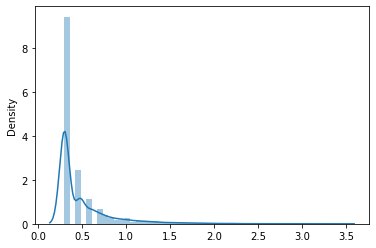

In [16]:
sns.distplot(np.log10(unique_edge_weights + 1))

In [17]:
df = pd.DataFrame(illness_graph, columns=all_illnesses)
df.index = all_illnesses
df

,abdominal hernia,abnormal smear (cervix),acne/acne vulgaris,acromegaly,acute infective polyneuritis/guillain-barre syndrome,adrenal tumour,adrenocortical insufficiency/addison's disease,alcohol dependency,alcoholic liver disease / alcoholic cirrhosis,allergy or anaphylactic reaction to drug,...,varicose veins,vasculitis,venous thromboembolic disease,vertigo,vitiligo,vocal cord polyp,wegners granulmatosis,whooping cough / pertussis,wolff parkinson white / wpw syndrome,yellow fever
abdominal hernia,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abnormal smear (cervix),0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acne/acne vulgaris,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
acromegaly,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acute infective polyneuritis/guillain-barre syndrome,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal cord polyp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
wegners granulmatosis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
whooping cough / pertussis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
wolff parkinson white / wpw syndrome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


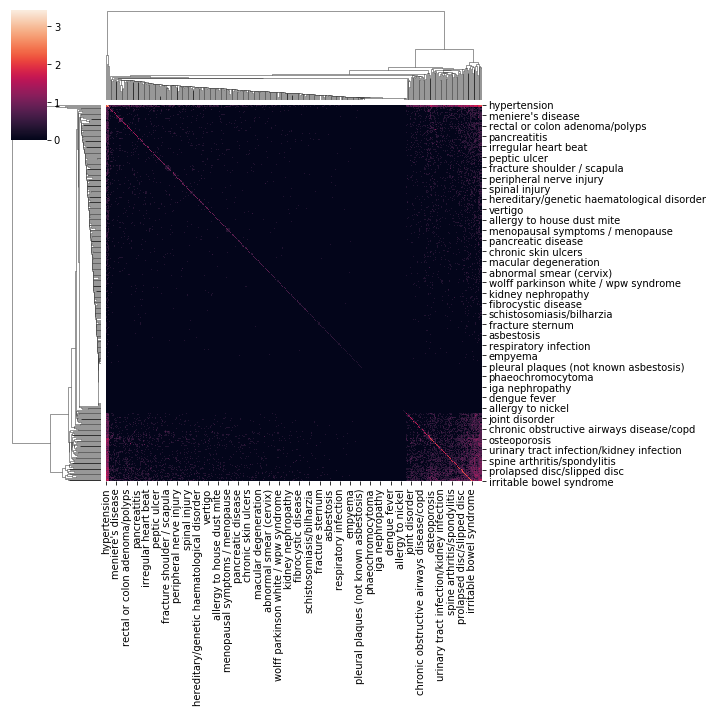

In [18]:
sns.clustermap(np.log10(df + 1))

In [19]:
from analysis import *

No handles with labels found to put in legend.


(0.9170529339441191, 0.0005706937117271765)

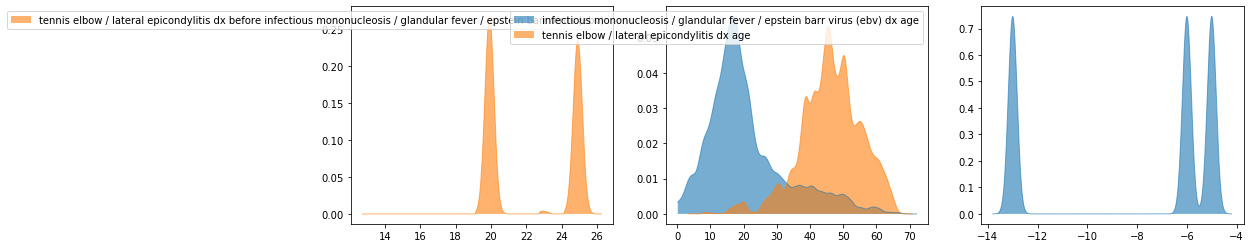

In [577]:
precursor_illness = "infectious mononucleosis / glandular fever / epstein barr virus (ebv)"
illness = "tennis elbow / lateral epicondylitis"

_, precursor_dx_ages = get_illness_value_dx_age(biobank_data, precursor_illness, "illness_code")
_, illness_dx_ages = get_illness_value_dx_age(biobank_data, illness, "illness_code")

precursor_before_illness = illness_dx_ages > precursor_dx_ages
precursor_values, illness_values = precursor_dx_ages >= 0, illness_dx_ages >= 0

fig, (a0, a1, a2) = plt.subplots(figsize=(16, 4), ncols=3)
params = dict(bw=0.1, clip=(0, None))
kde_plot(illness_dx_ages[precursor_values & precursor_before_illness],
         label=f"{illness} dx after {precursor_illness}", ax=a0, **params)
kde_plot(illness_dx_ages[precursor_values & ~precursor_before_illness & illness_values],
         label=f"{illness} dx before {precursor_illness}", ax=a0, **params)
kde_plot(precursor_dx_ages[precursor_values], label=f"{precursor_illness} dx age", ax=a1, **params)
kde_plot(illness_dx_ages[illness_values], label=f"{illness} dx age", ax=a1, **params)
kde_plot((illness_dx_ages - precursor_dx_ages)[precursor_values & illness_values], bw=.05, ax=a2)

preceding_event_test(precursor_dx_ages, illness_dx_ages)

In [186]:
np.random.seed(6)
some_illnesses_raw = sorted(np.random.choice(all_illnesses, 20))
some_illnesses_raw = all_illnesses

illness_dx_data = {}
for illness in tqdm(some_illnesses_raw, desc="Aggregating illness dates", unit=" illnesses"):
    new_illness_label = illness.replace(" ", "_")
    _, illness_dx_age = get_illness_value_dx_age(biobank_data, illness, "illness_code")
    illness_dx_data[new_illness_label] = illness_dx_age

illness_dx_data = pd.DataFrame(illness_dx_data)
some_illnesses = list(illness_dx_data.columns)

Aggregating illness dates:   0%|          | 0/444 [00:00<?, ? illnesses/s]

In [451]:
np.random.seed(6)
# some_illnesses = sorted(np.random.choice(list(illness_dx_data.columns), 100, replace=False))
some_illnesses = list(illness_dx_data.columns)

In [381]:
from tqdm.notebook import tqdm

In [578]:
# Precomputing age distributions
params = dict(min_value=-1, max_value=110, n_sample=1000)

distributions = {}
for illness in tqdm(some_illnesses, unit=" illnesses", desc="Precomputing age distributions"):
    illness_dx_ages = illness_dx_data[illness].values
    illness_values = illness_dx_ages >= 0
    _, y_probs = create_sampled_distribution(illness_dx_ages[illness_values], **params)
    distributions[illness] = (y_probs, illness_values)

preceding_event_values = []

# comparing all illness age distributions
pbar = tqdm(total=len(some_illnesses) ** 2, unit=" illnesses", desc="Identifying preceding illnesses")
for illness in some_illnesses:
    illness_preceding_tests = []
    for precursor_illness in some_illnesses:
        if precursor_illness == illness:
            illness_preceding_tests.append([np.nan, 0, 0, 0])
        else:
            precursor_dx_ages, illness_dx_ages = illness_dx_data[precursor_illness].values, illness_dx_data[illness].values

            illness_dist, illness_values = distributions[illness]
            precursor_dist, precursor_values = distributions[precursor_illness]
            illness_and_infection = precursor_values & illness_values
                
            n_with_illness_and_infection = np.count_nonzero(illness_and_infection)
            precedes = illness_dx_ages > precursor_dx_ages
            n_with_illness_and_prior_infection = np.count_nonzero(illness_and_infection & precedes)
            p = np.sum(np.append([0], np.cumsum(precursor_dist))[:-1] * illness_dist)

            if n_with_illness_and_infection <= 4:
                illness_preceding_tests.append([np.nan, 0, 0, 0])
            else:
                results = stats.binomtest(n_with_illness_and_prior_infection, n_with_illness_and_infection,
                                          p=p, alternative="greater")
                illness_preceding_tests.append([results.pvalue, n_with_illness_and_prior_infection,
                                            n_with_illness_and_infection, p])

        pbar.update(1)

    preceding_event_values.append(illness_preceding_tests)
pbar.close()

# preceding_tests = pd.DataFrame(preceding_tests, columns=some_illnesses)
# preceding_tests.index = some_illnesses

Precomputing age distributions:   0%|          | 0/444 [00:00<?, ? illnesses/s]

Identifying preceding illnesses:   0%|          | 0/197136 [00:00<?, ? illnesses/s]

In [579]:
row_index.shape

(444,)

In [599]:
preceding_event_values = np.array(preceding_event_values)
data_keys = ["pvalue", "n_with_preceding", "n_with_both", ]
preceding_events_data = {key: preceding_event_values[:, :, i] for i, key in enumerate(data_keys)}
preceding_events_data["all"] = preceding_event_values
preceding_events_data["columns"] = np.array(some_illnesses)
preceding_events_data["rows"] = np.array(some_illnesses)

p_value_significance_threshold = 0.0001

significant_values = preceding_event_values[:, :, 0] <= p_value_significance_threshold
row_index, col_index = np.any(significant_values, axis=1), np.any(significant_values, axis=0)

all_significant_events = preceding_event_values[row_index][:, col_index]
significant_events_data = {key: all_significant_events[:, :, i] for i, key in enumerate(data_keys)}
significant_events_data["all"] = all_significant_events
significant_events_data["columns"] = np.array(some_illnesses)[col_index]
significant_events_data["rows"] = np.array(some_illnesses)[row_index]

In [600]:
significant_events_data["pvalue"].shape

(56, 35)

In [601]:
print(stats.binomtest(6, 6, p=.75, alternative="greater"))
print(stats.binomtest(6, 6, p=.75, alternative="less"))
print(stats.binomtest(6, 6, p=.75, alternative="two-sided"))

BinomTestResult(k=6, n=6, alternative='greater', proportion_estimate=1.0, pvalue=0.17797851562500003)
BinomTestResult(k=6, n=6, alternative='less', proportion_estimate=1.0, pvalue=1.0)
BinomTestResult(k=6, n=6, alternative='two-sided', proportion_estimate=1.0, pvalue=0.347412109375)


# Preceding Event Graph

In [602]:
G = np.zeros_like(significant_events_data["pvalue"])
edge_list = []

for j, preceding_illness in enumerate(significant_events_data["columns"]):
    for i, illness in enumerate(significant_events_data["rows"]):
        if significant_events_data["pvalue"][i, j] < p_value_significance_threshold:
            G[i, j] = 1 / (significant_events_data["n_with_preceding"][i, j] / significant_events_data["n_with_both"][i, j])
#             print(preceding_illness, " -> ",  illness, significant_events_data["all"][i, j])
            edge_list.append([preceding_illness, illness, "Undirected", G[i, j]])
edge_list = pd.DataFrame(edge_list, columns = ["source", "target", "type", "weight"])

In [603]:
import networkx as nx
g = nx.from_pandas_edgelist(edge_list, source="source", target="target", edge_attr="weight")

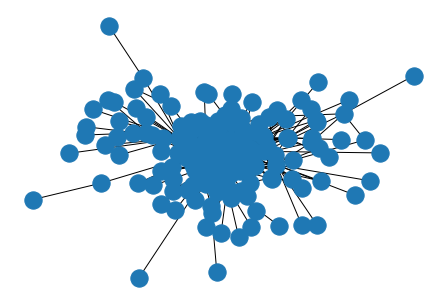

In [604]:
# nx.draw(g, pos=nx.circular_layout(g))
nx.draw(g, pos=nx.draw_kamada_kawai(g),  arrowstyle='fancy')

In [605]:
a = df["tennis_elbow_/_lateral_epicondylitis"]
a[a > 0]

eczema/dermatitis    1.333333
Name: tennis_elbow_/_lateral_epicondylitis, dtype: float64

In [606]:
import pyvis.network as nt
net = nt.Network(notebook=True, directed=True)

net.from_nx(g)
net.show("illness_EDA_plots/example.html")

Text(909.1249999999999, 0.5, 'Illness')

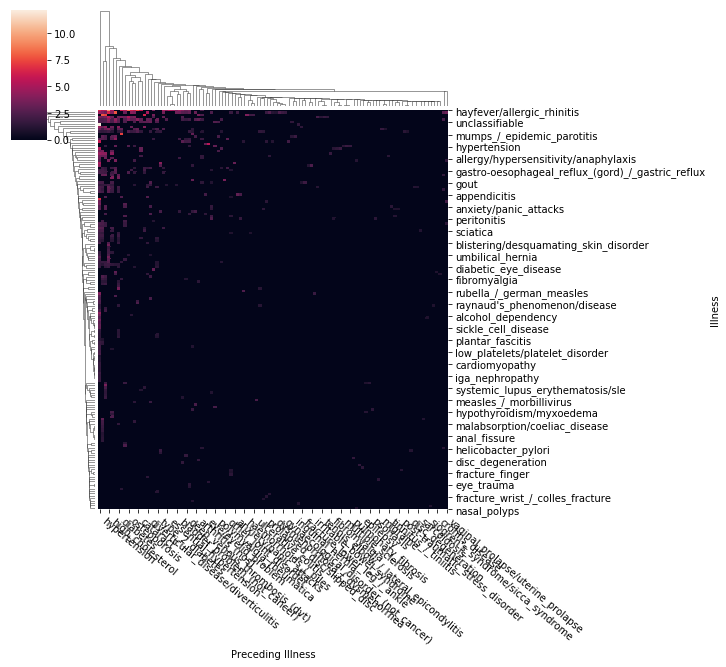

In [598]:
df = pd.DataFrame(G, columns=significant_events_data["columns"])
df.index = significant_events_data["rows"]

g = sns.clustermap(df)
ax = g.ax_heatmap
plt.setp(ax.get_xticklabels(), rotation=320, ha="left")
ax.set_xlabel("Preceding Illness")
ax.set_ylabel("Illness")

In [388]:
p_value_threshold = 0.01
df = pd.DataFrame(preceding_events_data["pvalue"], columns=preceding_events_data["columns"])
df.index = preceding_events_data["rows"]
significant = df.loc[df.lt(p_value_threshold).any(axis=1), df.lt(p_value_threshold).any()]
significant

,allergy_or_anaphylactic_reaction_to_food,anaemia,appendicitis,bph_/_benign_prostatic_hypertrophy,breast_cysts,cataract,cushings_syndrome,dry_eyes,eczema/dermatitis,enlarged_prostate,...,pernicious_anaemia,psoriasis,renal_failure_not_requiring_dialysis,retinal_detachment,rubella_/_german_measles,spine_arthritis/spondylitis,stroke,testicular_problems_(not_cancer),tonsiltis,ulcerative_colitis
allergy_or_anaphylactic_reaction_to_food,NaN,1.000000,6.180384e-01,NaN,0.183927,6.238374e-01,NaN,0.628921,4.156539e-02,0.144629,...,4.823527e-01,7.146662e-02,0.579666,4.197126e-01,0.033509,7.250339e-01,0.005575,NaN,0.729711,0.253805
anaemia,1.000000e+00,NaN,6.809593e-01,NaN,1.000000,1.553976e-01,NaN,0.557590,7.143547e-01,0.006199,...,6.546725e-01,4.009664e-01,0.678648,6.985136e-01,NaN,1.918431e-01,0.100939,NaN,0.031307,0.678990
appendicitis,7.968923e-01,1.000000,NaN,0.478672,0.006338,6.052992e-01,NaN,0.300348,3.082497e-01,0.245707,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.787463,1.000000e+00,1.000000,0.405118,0.004979,0.334636
bph_/_benign_prostatic_hypertrophy,NaN,NaN,4.838043e-01,NaN,NaN,1.411090e-03,NaN,0.380761,1.551251e-01,0.617475,...,5.626465e-02,4.784614e-01,NaN,5.786160e-01,NaN,6.843035e-02,0.527380,0.014536,1.000000,1.000000
breast_cysts,1.852946e-01,1.000000,6.733529e-03,NaN,NaN,6.471445e-01,NaN,0.600526,7.175022e-01,NaN,...,1.000000e+00,8.421595e-01,NaN,7.580061e-01,1.000000,5.904287e-01,0.712211,NaN,1.000000,0.267300
cataract,6.256199e-01,0.158518,6.075938e-01,0.001300,0.242941,NaN,0.005088,0.086042,3.545470e-01,0.537218,...,1.293399e-01,7.479055e-01,0.060272,9.158931e-10,0.328015,6.584812e-01,0.466264,0.754189,0.598191,0.712677
dry_eyes,6.303493e-01,1.000000,3.046367e-01,0.376589,0.600084,8.165748e-04,NaN,NaN,1.588514e-03,0.123502,...,2.098993e-01,1.976639e-01,NaN,4.321772e-01,NaN,1.190825e-01,0.758705,NaN,1.000000,0.599691
eczema/dermatitis,5.855790e-13,0.852437,2.604012e-01,0.459119,0.276950,5.367806e-01,1.000000,0.115664,NaN,0.026726,...,2.801361e-01,2.986672e-11,1.000000,4.076304e-03,1.000000,1.000000e+00,0.079931,0.055078,0.363383,0.325000
enlarged_prostate,1.505155e-01,0.006518,2.510952e-01,1.000000,NaN,2.526236e-02,NaN,0.126438,1.263303e-05,NaN,...,1.769719e-01,7.104537e-01,0.000913,2.396844e-02,1.000000,1.687293e-01,0.185142,0.003173,1.000000,0.130361
fibromyalgia,5.791463e-01,NaN,1.000000e+00,NaN,1.000000,8.240279e-01,NaN,0.822609,7.889092e-01,NaN,...,1.000000e+00,6.301132e-03,NaN,NaN,NaN,1.423822e-01,0.759952,NaN,0.312170,0.189242


In [320]:
df = pd.read_csv(os.path.join(constants.RESOURCES_DIR_PATH, "cached_data", "all_illness_preceding_tests.csv"))
df.index = df["Unnamed: 0"].values
df = df.drop(["Unnamed: 0"], axis="columns")
df

,abdominal_hernia,abnormal_smear_(cervix),acne/acne_vulgaris,acromegaly,acute_infective_polyneuritis/guillain-barre_syndrome,adrenal_tumour,adrenocortical_insufficiency/addison's_disease,alcohol_dependency,alcoholic_liver_disease_/_alcoholic_cirrhosis,allergy_or_anaphylactic_reaction_to_drug,...,varicose_veins,vasculitis,venous_thromboembolic_disease,vertigo,vitiligo,vocal_cord_polyp,wegners_granulmatosis,whooping_cough_/_pertussis,wolff_parkinson_white_/_wpw_syndrome,yellow_fever
abdominal_hernia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335652,...,0.096525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_smear_(cervix),NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400481,...,0.227919,NaN,NaN,0.166417,NaN,NaN,NaN,0.128795,NaN,NaN
acne/acne_vulgaris,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.373692,...,0.426655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromegaly,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acute_infective_polyneuritis/guillain-barre_syndrome,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal_cord_polyp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562114,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
wegners_granulmatosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
whooping_cough_/_pertussis,NaN,0.128373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
wolff_parkinson_white_/_wpw_syndrome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
